moscow property kaggle chalenge
Ruairidh Cumming
30/10/2018

In [79]:
#import statements 
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from math import sqrt
import statistics as st
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#load data
train = pd.read_csv('C:\\Users\\ruair\\Documents\\GitHub\\Kaggle\\Moscow Property/train.csv')
tst =pd.read_csv('C:\\Users\\ruair\\Documents\\GitHub\\Kaggle\\Moscow Property/test.csv')


In [4]:
#process training set 
X=train.drop(['SalePrice'], axis = 1)
X[X.columns.values[X.dtypes == 'object' ]]=X[X.columns.values[X.dtypes == 'object' ]].fillna('none')
y=train['SalePrice']

#process test set (same as X)
tst[tst.columns.values[tst.dtypes == 'object' ]]=tst[tst.columns.values[tst.dtypes == 'object' ]].fillna('none')


In [85]:
#assign skl elements 
reg1 = RandomForestRegressor(max_depth = 2, random_state = 0, n_estimators =1000, verbose = True)
le= preprocessing.LabelEncoder()
#label encode dataframes 
Xenc = X.apply(le.fit_transform)
tstenc = tst.apply(le.fit_transform)
#create subsample for accuract testing
Xtrain,Xtst,Ytrain,Ytst = train_test_split(Xenc,y,test_size = 0.2, random_state = 42)
reg1.fit(Xtrain,Ytrain)

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    2.8s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=0, verbose=True, warm_start=False)

In [86]:
Ans =reg1.predict(Xtst)
Xtst['Ans']=Ans
Xtst['SalePrice']=Ytst
Xtst['err']=(Xtst.SalePrice-Xtst.Ans)/Xtst.SalePrice
Xtst['AbsErr']=Xtst.SalePrice-Xtst.Ans


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packa

In [76]:
min(Xtst.err)

-2.782105251824804

(array([  1.,   1.,   0.,   0.,   2.,   6.,  12.,  46., 164.,  60.]),
 array([-2.78210525, -2.46016169, -2.13821812, -1.81627456, -1.49433099,
        -1.17238742, -0.85044386, -0.52850029, -0.20655673,  0.11538684,
         0.4373304 ]),
 <a list of 10 Patch objects>)

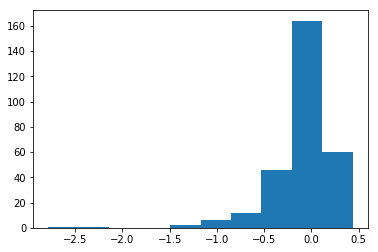

In [77]:
plt.hist(Xtst.err)

Text(0.5,1,'Zoneing')

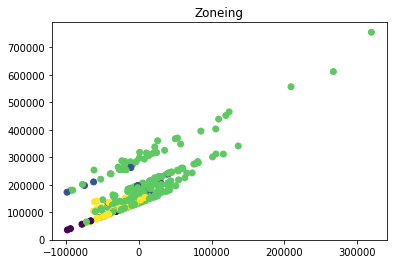

In [87]:
plt.scatter(Xtst.AbsErr,Xtst.SalePrice, c = Xtst.MSZoning)
plt.title('Zoneing')


Text(0.5,1,'Zoneing')

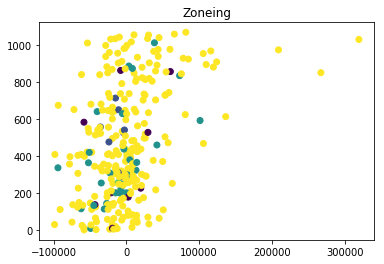

In [93]:
plt.scatter(Xtst.AbsErr,Xtst.LotArea, c = Xtst.Fence)
plt.title('Zoneing')


In [94]:
Xtst.corr

<bound method DataFrame.corr of         Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
892    892           0         3           41      324       1      2   
1105  1105           5         3           69      804       1      2   
413    413           1         4           27      402       1      0   
522    522           4         4           21       95       1      2   
1036  1036           0         3           60      848       1      2   
614    614          13         4            0        2       1      2   
218    218           4         3          245      967       1      2   
1160  1160          12         3            1       20       1      2   
649    649          13         4            0       10       1      2   
887    887           4         3           30      983       1      2   
576    576           4         3           23      147       1      2   
1252  1252           0         3           33      526       1      2   
1061  1061         